### Курсовой проект по курсу "Теория вероятностей и математическая статистика"

Цель: исследование и визуализация статистических распределений субтанций хим.состава, входящих в состав белого вина. Выявление хим.веществ, оказывающих ключевое влияние на сорт , методом корреляционного анализа . Выявление стат.различий содержания основных веществ в разрезе сортов вин.

План проекта: 
1. Загрузка датасета 
2. Расчет основных статистик
3. Визуализация статистических распределений характеристик хим.состава
4. Расчет матрицы корреляций. Графическое отображение результата с помощью тепловой карты
5. Визуализация различий в содержании выбранных для анализа хим.субстанций в зависимости от сорта вина
6. Определение списка подгрупп и отбор признаков для исследования
7. Выявление стат.различий между сортами по содержанию отобранных для анализа веществ, методом дисперсионного анализа

In [141]:
import pandas as pd
import numpy as np
import scipy.stats as stt
import matplotlib.pyplot as plt
import seaborn as sns
import wget
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [142]:
#Единый стиль графиков
large = 16; med = 14; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (15, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')



### 1.Загрузка датасета

In [143]:
# Импорт датасета
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
PATH_TO_DATA = "C:/Users/Nina/Downloads/12.22.Теория вероятностей и математическая статистика/"
FILENAME = 'winequality-white.csv'

wget.download(url, PATH_TO_DATA+FILENAME)

'C:/Users/Nina/Downloads/12.22.Теория вероятностей и математическая статистика/winequality-white (1).csv'

In [144]:
df = pd.read_csv(PATH_TO_DATA+FILENAME, sep=';')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [146]:
#Переименую колонки на русский
rus_col_names = ['фиксированная кислотность', 
             'летучая кислотность', 
             'лимонная кислота',
             'остаточный сахар',
             'хлориды',
             'свободный диоксид серы',
             'общий диоксид серы',
             'плотность',
             'pH',
             'сульфаты',
             'спирты',
             'СОРТ']
eng_col_names = df.columns.to_list()
df.columns = rus_col_names

In [147]:
df.head()

,фиксированная кислотность,летучая кислотность,лимонная кислота,остаточный сахар,хлориды,свободный диоксид серы,общий диоксид серы,плотность,pH,сульфаты,спирты,СОРТ
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Итак:

- датасет удобочитаем
- все данные выражены числами, тип определен (float и int)
- в данных нет пропусков
- все характеристики хим.состава вина являются непрерывными количесвенными признаками
- признак "СОРТ" является дискретным, что позволит разделить все вина на группы и сравнить руппы между собой методом дисперси онного анализа
- 'СОРТ' является целевым признаков , если решать задачу машинного обучения по классификации вин. Применима модель логистической регрессии


### 2. Расчет основных статистик


In [148]:
df_stats = df.describe()
df_stats.reset_index(drop=False, inplace=True)
df_stats.rename({'index': 'СТАТ.'}, axis=1, inplace=True)
df_stats

,СТАТ.,фиксированная кислотность,летучая кислотность,лимонная кислота,остаточный сахар,хлориды,свободный диоксид серы,общий диоксид серы,плотность,pH,сульфаты,спирты,СОРТ
0,count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
1,mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
2,std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
3,min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
4,25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
5,50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
6,75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
7,max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [149]:
palitra = ['lawngreen', 'lightpink', 'darkorange', 'tomato', 'darkgreen', 'yellowgreen', 'darkred']
qual_clases = list(df['СОРТ'].unique())
qual_clases

[6, 5, 7, 8, 4, 3, 9]

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: СОРТ, dtype: int64

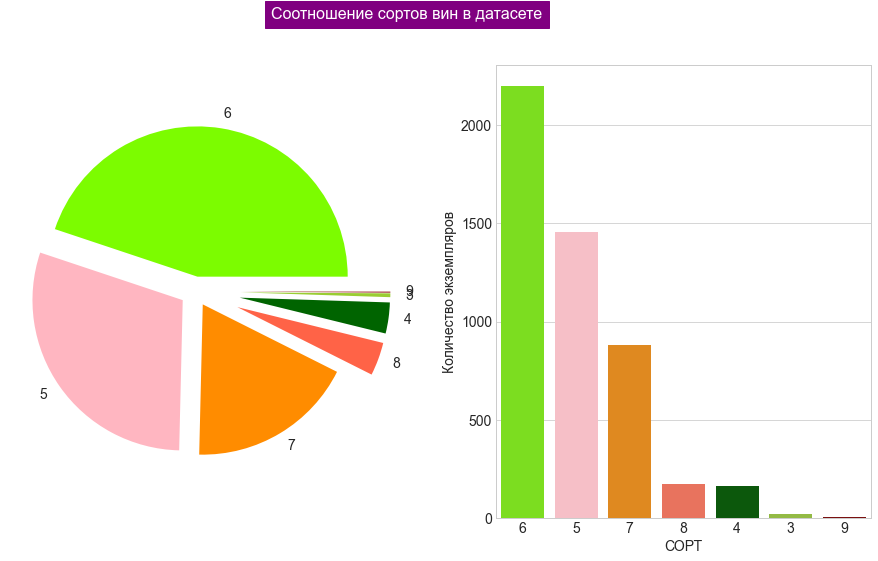

In [150]:
display(df['СОРТ'].value_counts())
qual_clases = df['СОРТ'].unique()
plt.subplots_adjust(left=0.13, 
                    right=0.93, 
                    top=0.9, 
                    bottom= 0.27, 
                    wspace= 0.3, 
                    hspace=0.3)
# Круговая диаграмма покажет соотношение вин в выборке по сортам
plt.subplot(121)
plt.pie(df['СОРТ'].value_counts(), 
        labels=df['СОРТ'].value_counts().index, 
        colors=palitra, 
        explode=[0.1, 0.1, 0.1, 0.3, 0.3, 0.3, 0.3], 
        shadow=False)
# гистограмма покажет во сколько раз размеры подвыборок отличаются по количеству экземпляров
plt.subplot(122)
sns.countplot(data=df, 
              x='СОРТ', 
              order=df['СОРТ'].value_counts().index, 
              palette=palitra)

plt.ylabel('Количество экземпляров')
plt.suptitle("Соотношение сортов вин в датасете",
             backgroundcolor='purple',
             color='white')
plt.show()

Итак, наиболее представлены в датасете вина средних оценок качества: 5, 6, 7 сорта. Наиболее "плохие" и наиболее "хорошие" сорта представлены минимальным количесвом образцов

### 3. Визуализация статистических распределений характеристик хим.состава

<Figure size 1080x720 with 0 Axes>

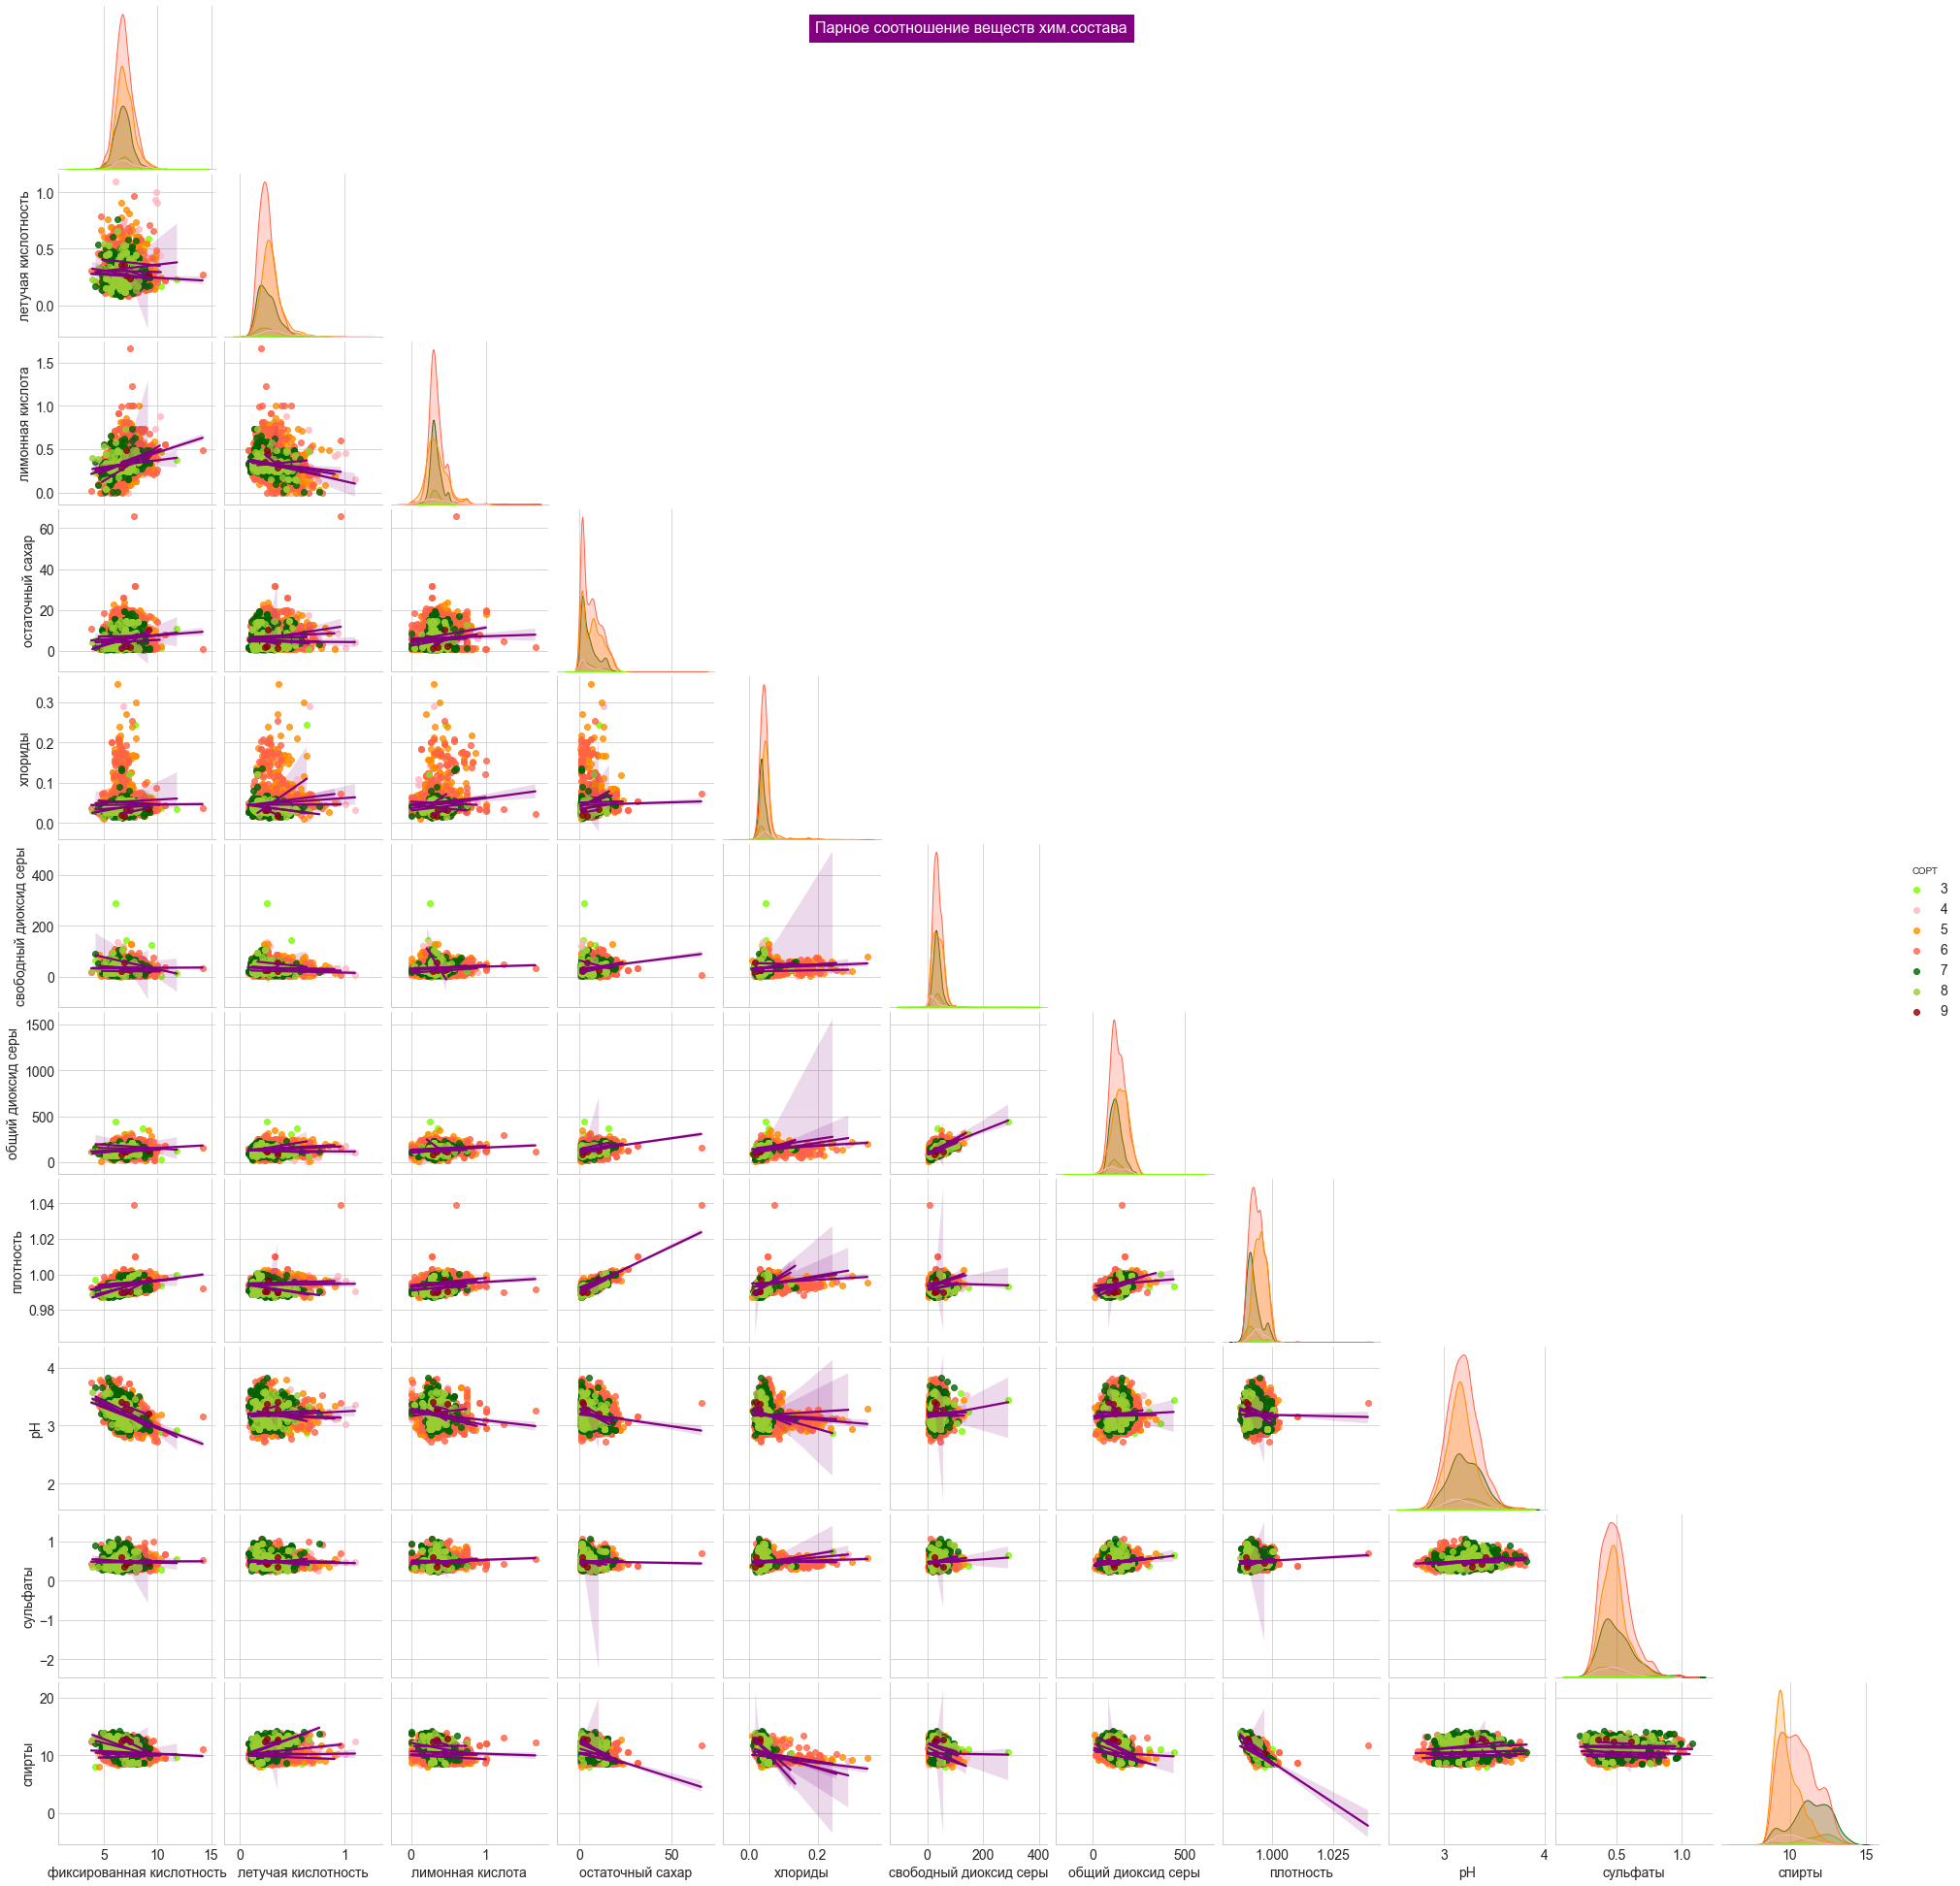

In [151]:
# парный график позволит бегло оценить различия хим.состава сортов вин,
# графики покажут стат.распределения концентарции веществ
# и их парное соотношение  в разрезе сортов вин
plt.tight_layout()
sns.pairplot(data=df,
             hue='СОРТ', 
             kind="reg",
             diag_kind='kde',
             plot_kws={'line_kws':{'color':'purple'}},
             corner=True,
             palette=palitra[0:7])
plt.suptitle("Парное соотношение веществ хим.состава",
         backgroundcolor='purple',
         color='white')
plt.show()

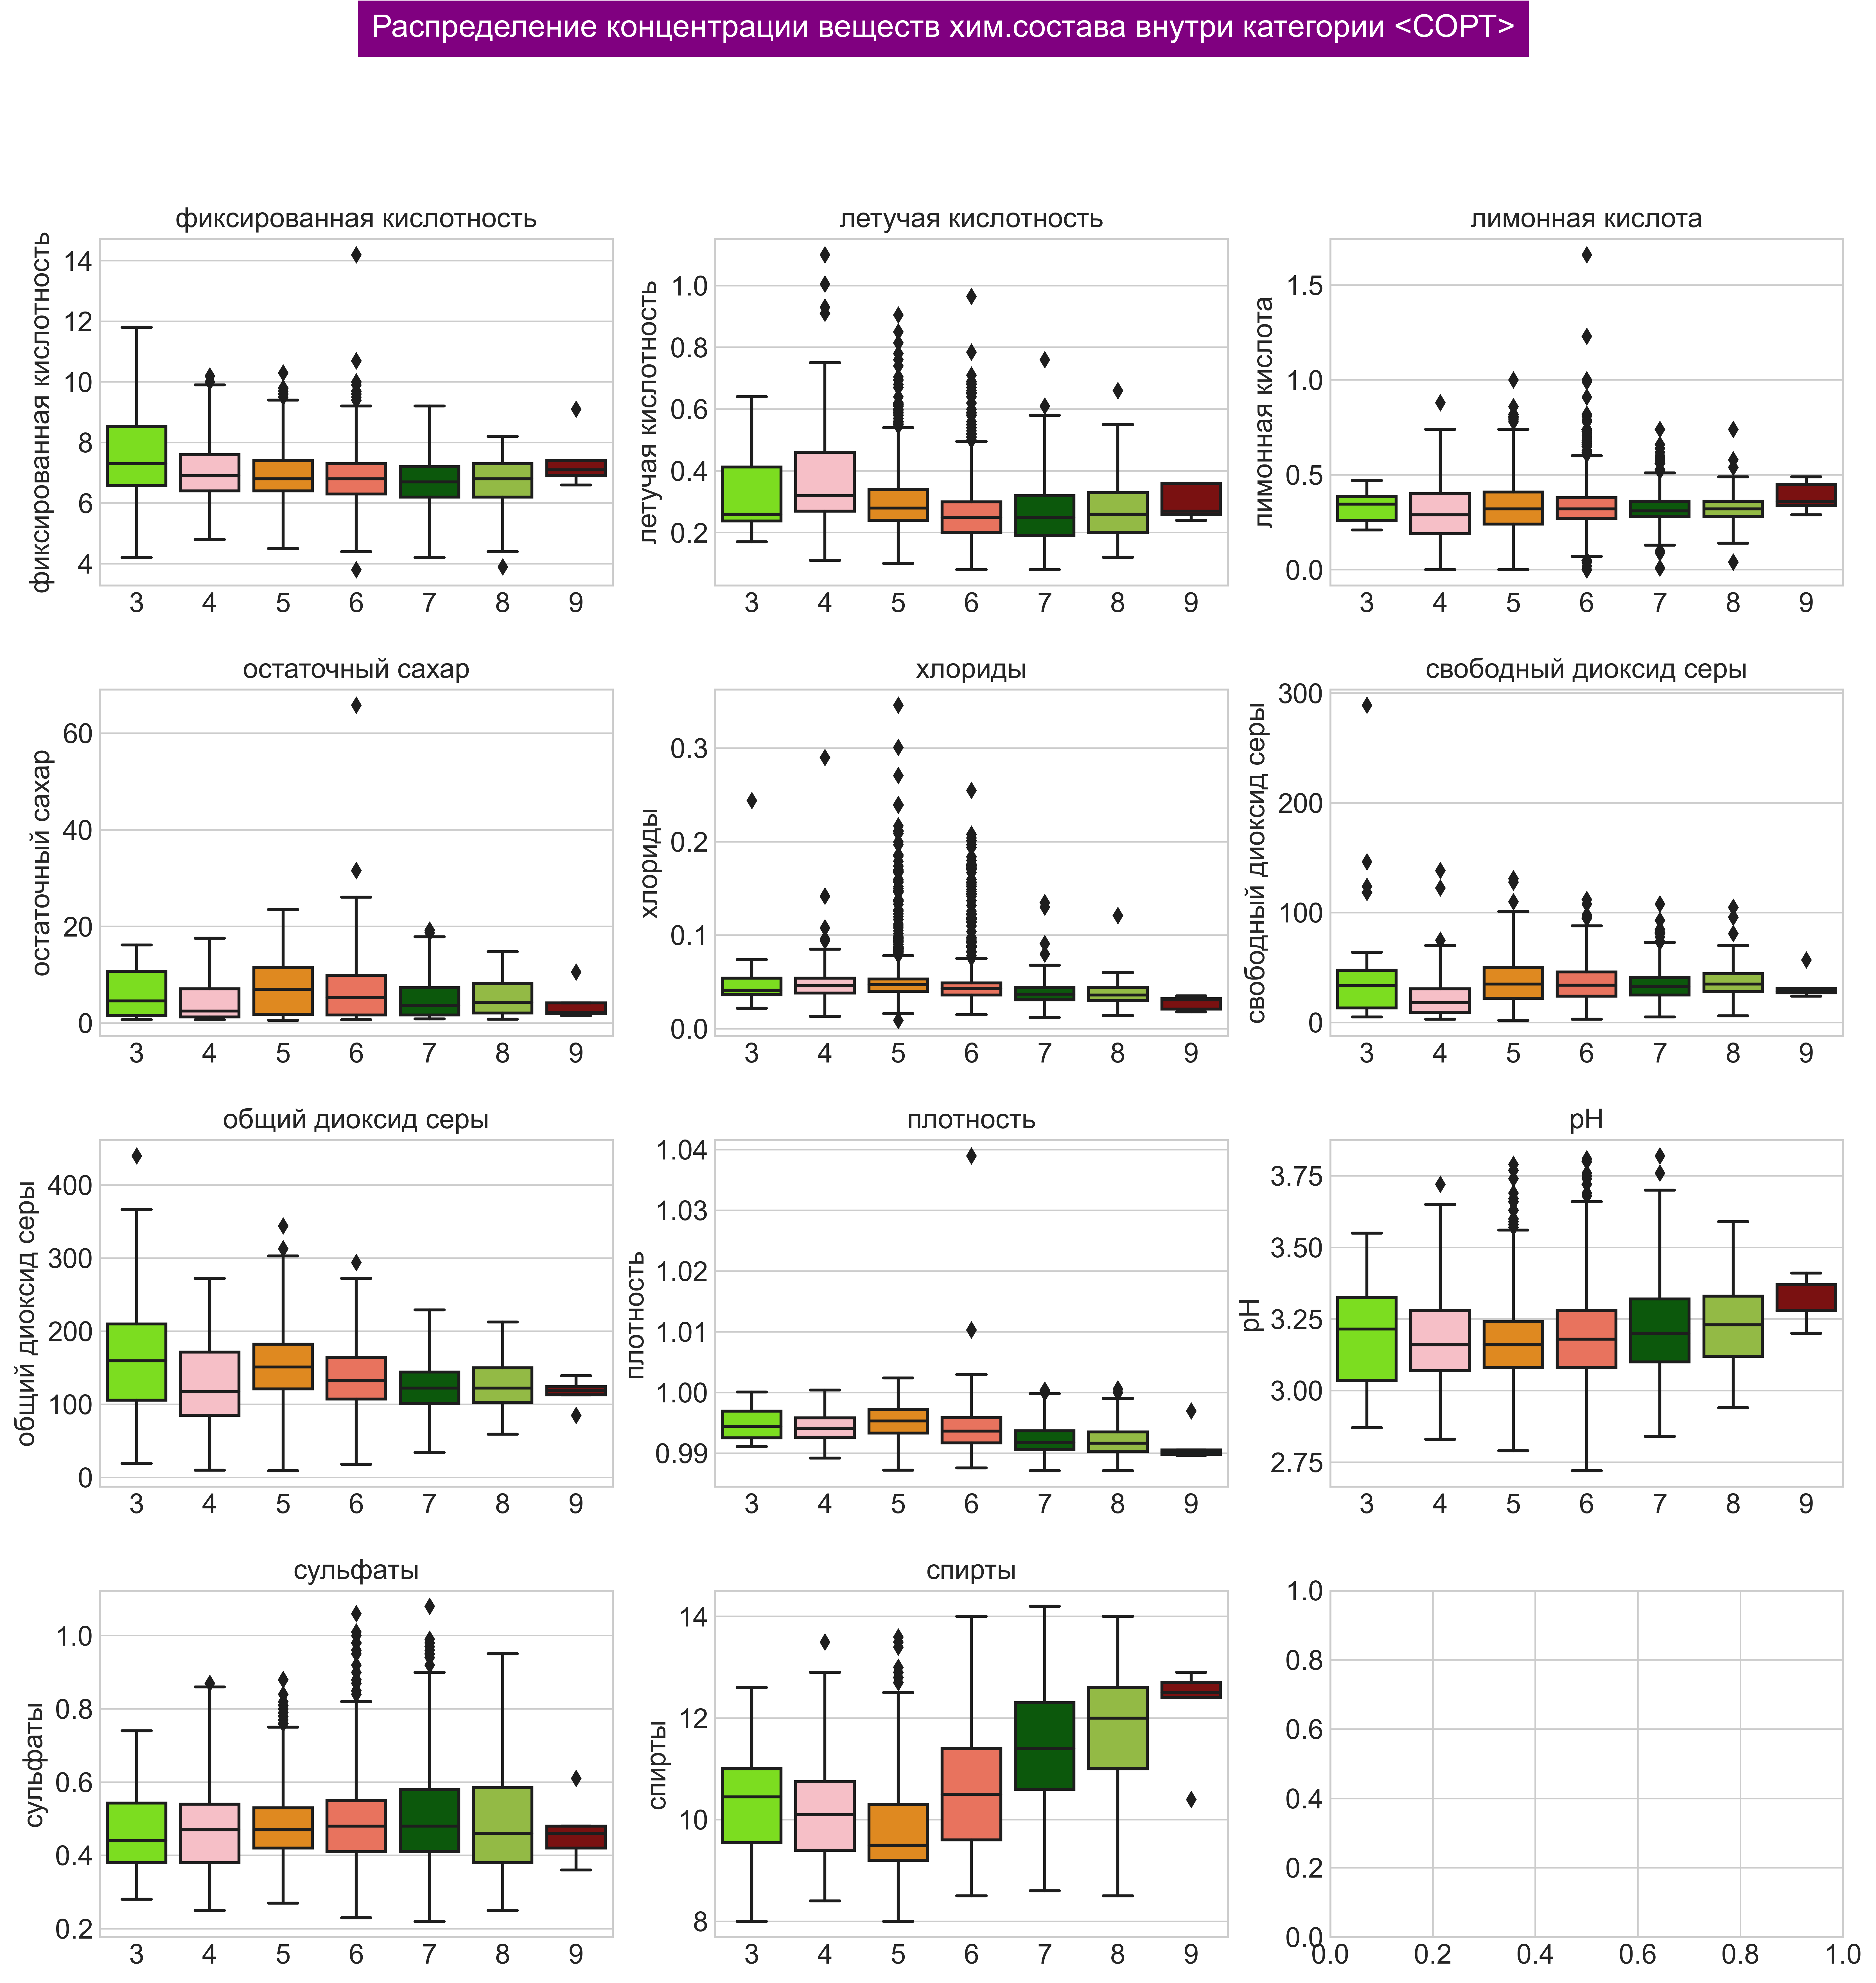

In [152]:
# визуализация среднего содержания вечеств в разрезе сорта
# графики boxplot
fig, axes = plt.subplots(4, 3, figsize=(16, 16), dpi = 500)
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)
# plt.tight_layout()
for n, subst in enumerate(rus_col_names[0:11]):
    sns.boxplot(data=df,
               x='СОРТ', 
                y=subst,
               ax=axes[n],
               palette=palitra[0:7],
               whis=2)
    axes[n].set_title(subst)
    axes[n].set_xlabel('')
plt.suptitle('Распределение концентрации веществ хим.состава внутри категории <СОРТ>',
            backgroundcolor='purple',
         color='white')
plt.show()

### 4. Расчет матрицы корреляций. Графическое отображение корреляций с помощью тепловой карты

Корреляционная матрица рассчитывается по формуле коэфициентов корреляции Пирсона

$$r_{XY} = \frac{cov_{XY}}{\sigma_{X}\sigma_{Y}}$$

где $$cov_{XY} = M[(X - M(X))(Y - M(Y))] = M(XY) - M(X)M(Y)=\overline{X \cdot Y} - \overline{X} \cdot \overline{Y}$$

В библиотеке Pandas есть метод .corr(), позволяющий одной строкой кода рассчитать матрицу корреляцмй

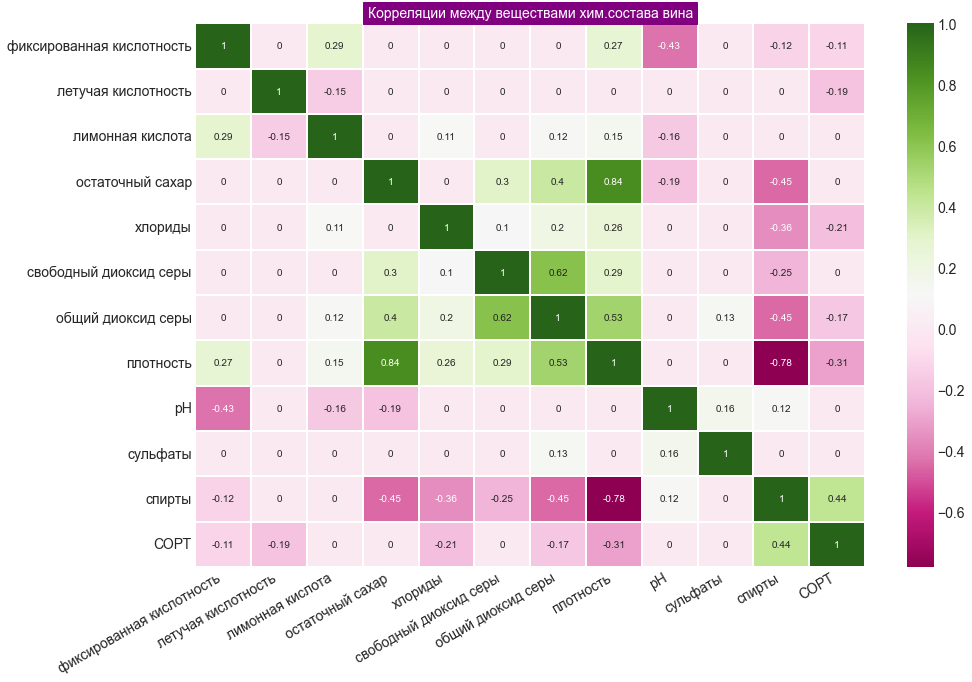

In [153]:
# исследование корреляции между признаками
# корреляции удобно визуализировать с помощью тепловой карты
# расчитаю матрицу корреляций с помощью метода corr()
corr_matrix = df.corr()
corr_matrix[np.abs(corr_matrix)<0.1]=0 # занулю корреляции, которе меньше 0.1, чтобы не мозолили глаз
sns.heatmap(data=corr_matrix,
           cmap='PiYG',
           linewidths=2,
           annot=True)
plt.xticks(rotation=30, ha='right')
plt.title('Корреляции между веществами хим.состава вина', 
          backgroundcolor='purple',
         color='white')
plt.show()

Концентрации спирта , хлоридов, общего диоксида серы оказывают более значимое влияние на сорт вина.
На графиках boxplot видно явное различие сортов вина по содержанию спирта , общего диоксида серы и хлоридов. Еще одна заметная особенность: в первоклассных сортах выще  содердание лимонной кислоы. При этом , лимонная кислота не коррелирует с сортом вина , но есть незначительные линейные корреляции с хлоридами и общими диоксидами. Поэтому предпочту не рассматривать более детально этот признак.

Помимо этого, есть явное отличие сортов вин по плотности: чем лучше сорт, тем большим значением плотности характеризуется его группа. Плотность коррелирует c содержанием спирта , хлоридов и  общего диоксида серы и практически не имеет выбросов. В принципе , можно рассмотреть её в качесвте ключевого фактора. Но лучше рассматривать группу факторов, которые на нё влияют, а именно: спирта , хлоридов, общего диоксида серы
График pairplot показавает, что зависимости не линейные (ни один из признаков не формирует прямую линию тренда). Более менее напоминает линию линейной регресии график зависимости плотности и остаточного сахара. Но сам по себе остаточный сахар не коррелирует с сортом вина.
Плотность харакреризуется линейной зависимостью от содержания спиртов, лимонной кислоты и сахара.

Итак, далее будет проведено сравнение сортов вин по характеристикам:
- спирты (содержание растет пропорцонално сорту вина)
- хлориды (чем выше сорт вина, тем ниже конценрация)
- общий диоксид  серы (чем ниже его содержание, тем выще сорт вина и "уже" разброс значений концентрации в вине). Медианное содержание по группе снижается в винах более высокого сорта)


### 5. Визуализация различий в содержании выбранных для анализа хим.субстанций в зависимости от сорта вина

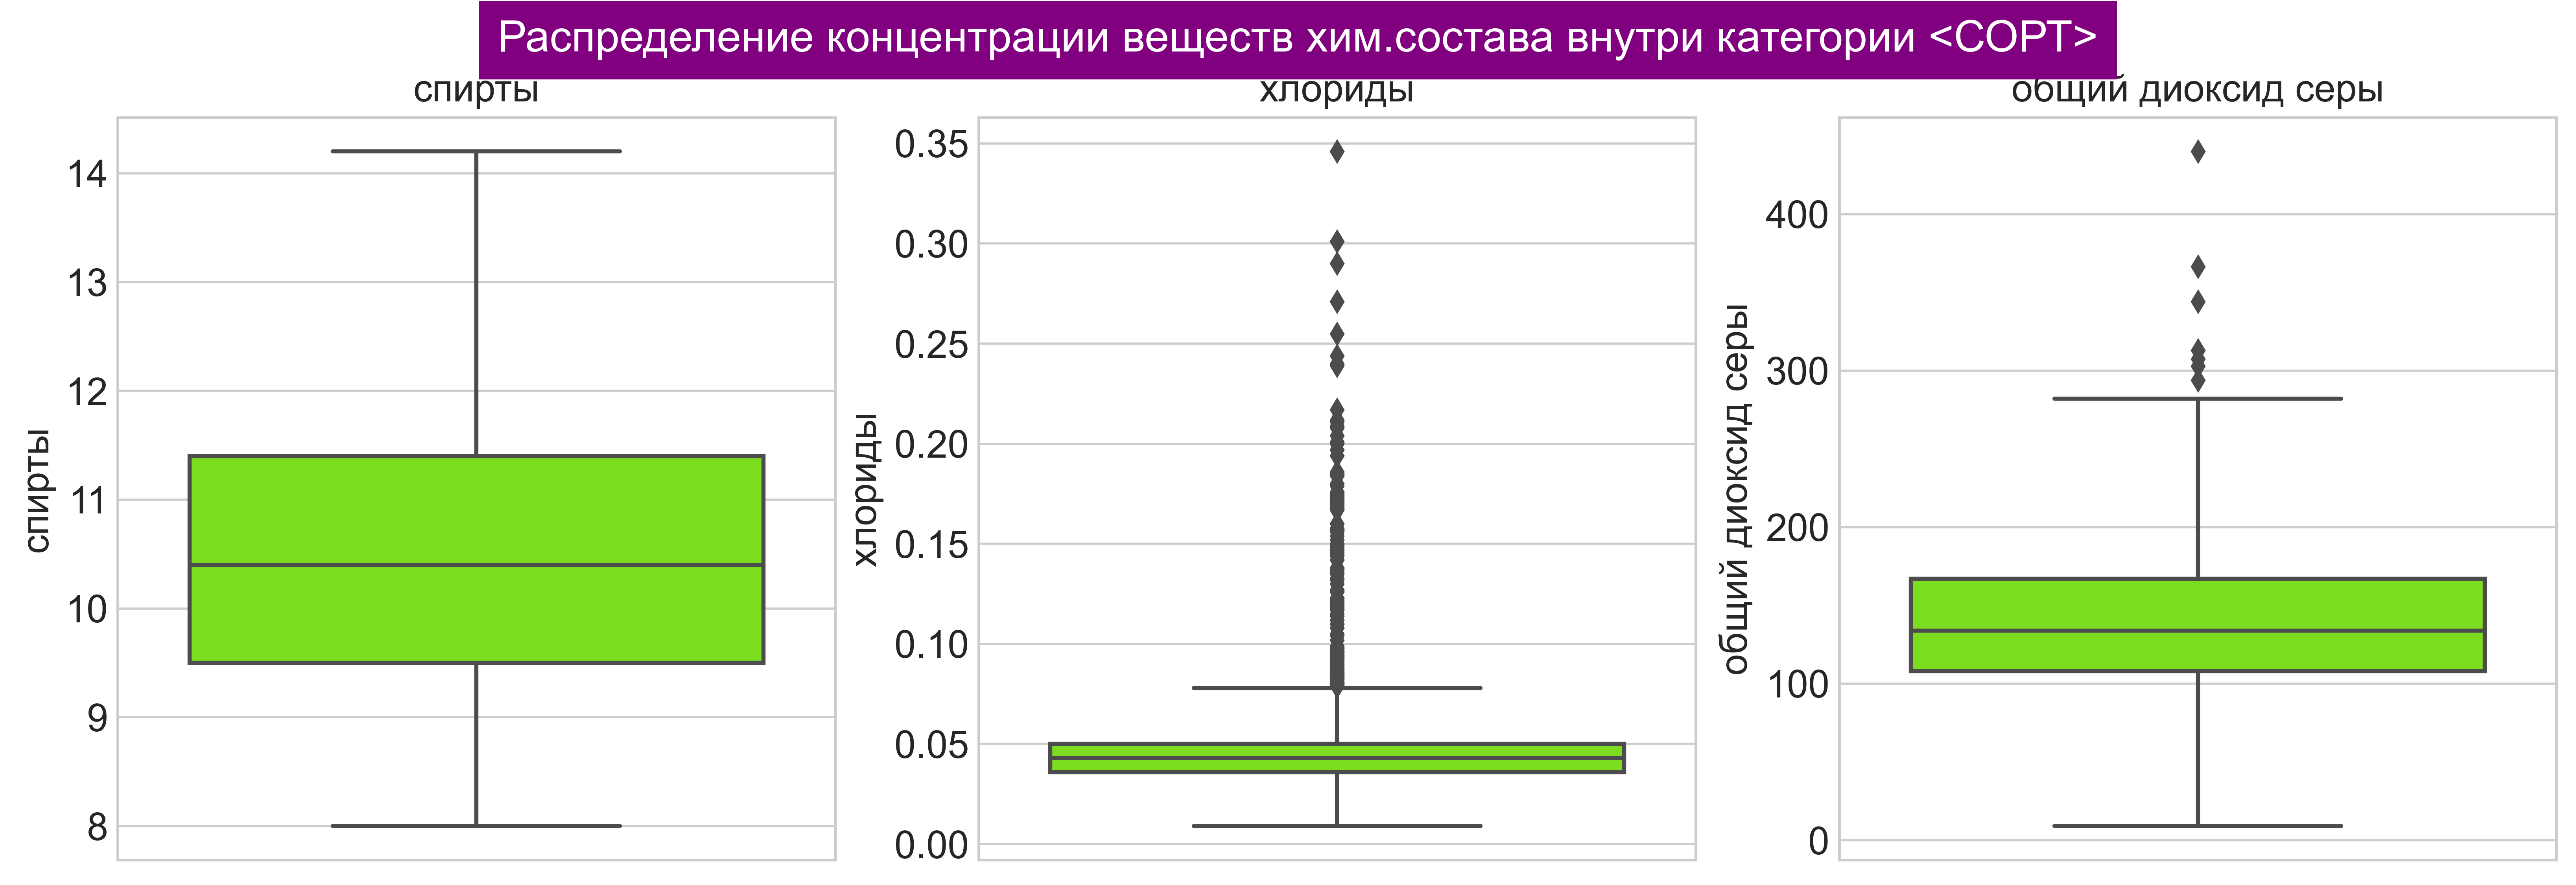

In [154]:
# в каждом из признаков уберу выбросы в целом по распределениям
substances = ['спирты', 'хлориды', 'общий диоксид серы']
fig, axes = plt.subplots(1, 3, figsize=(16, 5), dpi = 500)
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)
for n, subst in enumerate(substances):
    sns.boxplot(data=df,
                y=subst,
#                 x='СОРТ',
               ax=axes[n],
                palette=palitra,
               whis=2)
    axes[n].set_title(subst)
    axes[n].set_xlabel('')
plt.suptitle('Распределение концентрации веществ хим.состава внутри категории <СОРТ>',
            backgroundcolor='purple',
         color='white')
plt.show()

In [155]:
#удаление выбросов
df.drop(df[df['общий диоксид серы']>290].index , axis=0, inplace=True)
df.drop(df[df['хлориды']>0.075].index, axis=0, inplace=True)

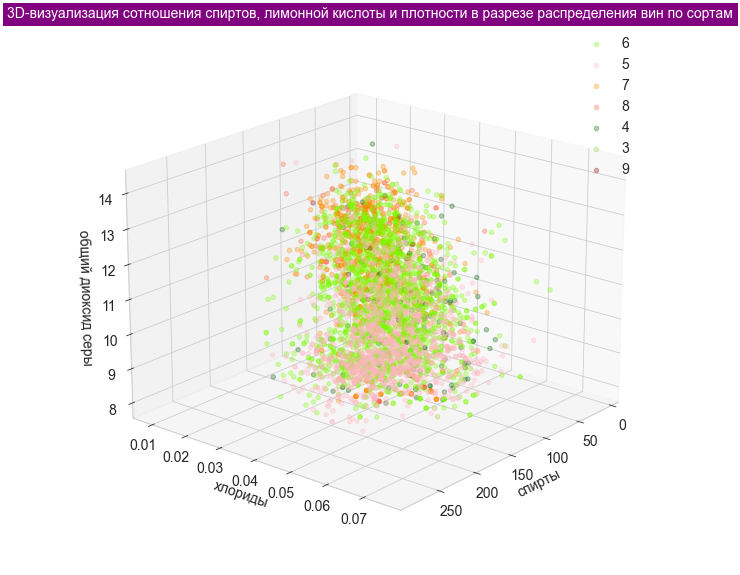

In [156]:
#Рисую <портрет> вина, используя отобранные в предыдущем пункте фичи
df = df[['спирты', 'хлориды', 'общий диоксид серы', 'СОРТ']]
fig = plt.figure()
ax = plt.axes(projection='3d')
for n, cl in enumerate(qual_clases):
    ax.scatter3D(df[df['СОРТ']==cl]['общий диоксид серы'], 
                 df[df['СОРТ']==cl]['хлориды'], 
                 df[df['СОРТ']==cl]['спирты'],
                 color=palitra[n], 
                 label=qual_clases[n],
                alpha=0.3)
ax.set_xlabel('спирты')
ax.set_ylabel('хлориды')
ax.set_zlabel('общий диоксид серы')
ax.set_title('3D-визуализация сотношения спиртов, лимонной кислоты и плотности в разрезе распределения вин по сортам',
         color='white',
        backgroundcolor='purple')
plt.legend(loc='upper right')
ax.view_init(20, 40)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


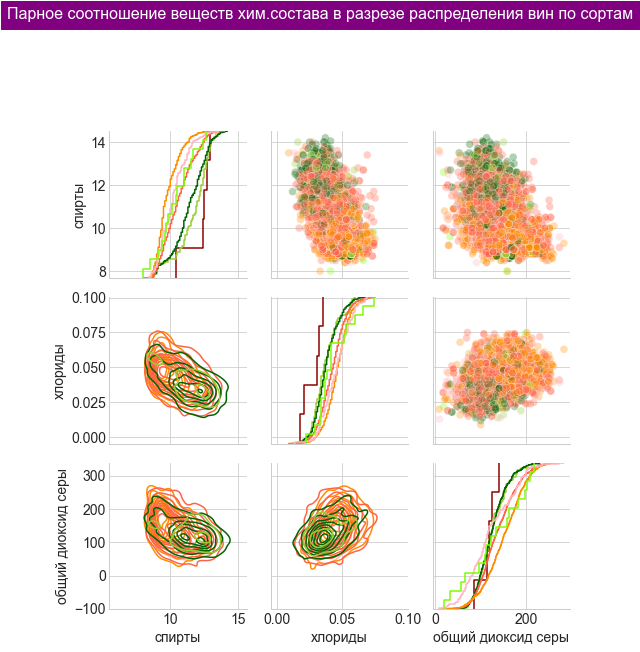

In [166]:
vis = sns.PairGrid(data= df,
                    hue = 'СОРТ', 
                   palette=palitra)
vis.map_upper(sns.scatterplot, s=60, alpha=0.3)
vis.map_diag(sns.ecdfplot)
vis.map_lower(sns.kdeplot, bw_agjust=0.7)
plt.suptitle("Парное соотношение веществ хим.состава в разрезе распределения вин по сортам",
         backgroundcolor='purple',
         color='white',
            y=1.2)
plt.legend()
plt.show()

### 6. Определение списка подгрупп и отбор признаков для исследования

In [158]:
features = ['спирты', 'хлориды', 'общий диоксид серы']
print('Исследуемые признаки: ', features)
print ('Количество иссследуемых подгрупп по каждому признаку (()):', qual_clases)

df_stats.loc[len(df_stats.index)] = ['S2', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
df_stats.loc[len(df_stats.index)] = ['S2f', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
df_stats.loc[len(df_stats.index)] = ['S_ост', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
df_stats.loc[len(df_stats.index)] = ['D', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
df_stats.loc[len(df_stats.index)] = ['D2f', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
df_stats.loc[len(df_stats.index)] = ['D_ост', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
df_stats.loc[len(df_stats.index)] = ['F_расч', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']
df_stats.loc[len(df_stats.index)] = ['"эта"', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

Исследуемые признаки:  ['спирты', 'хлориды', 'общий диоксид серы']
Количество иссследуемых подгрупп по каждому признаку (()): [6 5 7 8 4 3 9]


Гипотеза: проверить стат.различия сортов вина по содержанию 'спирты', 'хлориды', 'общий диоксид серы'.
На графиках прослеживается различие сортов по анным показатлям и наличие корреляций.
Если различия выборок достоверны, то можно использовать только эти фичи для модели классификации вин

### 7. Выявление стат.различий между сортами по содержанию отобранных для анализа веществ, методом дисперсионного анализа

Формулы для расчета:

$S^2$ — сумма квадратов отклонений наблюдений от общего среднего:
$$S^2 = \sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}({y}_{ij} - \overline{Y})^2$$
$S_F^2$ — сумма квадратов отклонений средних групповых значений от общего среднего значения $\overline{Y}$:
$$S_F^2 = \sum\limits_{i=1}^{k}(\overline{y}_i - \overline{Y})^2n_i$$
$S_{ост}^2$ — остаточная сумма квадратов отклонений:
$$S_{ост}^{2} = \sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y}_i)^2$$
Тогда сумма квадратов отклонений наблюдений от общего среднего дожна быть равна:
$$S^2 = S_F^2 + S_{ост}^2$$
Общая дисперсия:
$$\sigma_{общ}^{2} = \frac{S^2}{n - 1} = \frac{1}{n-1}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{Y})^2$$
Факторная дисперсия:
$$\sigma_{F}^{2} = \frac{S_{F}^{2}}{k-1} = \frac{1}{k-1}\sum\limits_{i=1}^{k}(\overline{y}_i - \overline{Y})^{2}n_i$$
Остаточная дисперсия:
$$\sigma_{ост}^{2} = \frac{S_{ост}^{2}}{n - k} = \frac{1}{n - k}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y}_i)^2$$
В дисперсионном анализе проверяется гипотеза $H_0$ о равенстве средних групповых значений количественного показателя:
$$F_H = \frac{\sigma_{F}^{2}}{\sigma_{ост}^{2}}$$
Если значение  $F_H$ превышает $F_{крит}$ из таблицы критических точек распределения Фишера-Снедекора для заданного уровня 
значимости $\alpha$ двух степеней свободы $df_{межд} = k - 1$ (относится к числителю соотношения) и $df_{внутр} = n - k$ (относится к знаменателю), 
то выборки имеют разные средние значения.
Еще одно соотношение:
$$\eta^{2} = \frac{S_{F}^{2}}{S_{общ}^{2}}$$

In [159]:
# Табличное значение критерия Фишера - Снедекора для k = 3, P = 0,01 и n стремящегося к бесконечности
F_extr = 3.78

In [160]:
# M - среднее в целом по признаку
#S2-сумма квадратов отклонений средних по каждому сорту вина от общего среднего в целом по признаку
#S2f - сумма квадратов отклонений средних групповых значений от общего среднего значения
# S_rem - остаточное отклонение

for f in features:
    M = df_stats.iloc[1][f] 
    S2 = 0
    S2f = 0
    for q in qual_clases:
        g = np.array(df[df['СОРТ']==q][f])
        g_m = g.mean()
        S2 = S2 + sum((g - M)**2)
        S2f = S2f + g.size*(g_m - M)**2
    S_rem = S2 - S2f
    D = df[f].var(ddof=1)
    D2f = S2f / (qual_clases.size -1)
    D_rem = S_rem / (df.shape[0] - qual_clases.size)
    F = D2f / D_rem
    eta = S2f / S_rem
    df_stats.at[8, f] = round(S2, 5)
    df_stats.at[9, f] = round(S2f, 5)
    df_stats.at[10, f] = round(S_rem, 5)
    df_stats.at[11, f] = round(D, 5)
    df_stats.at[12, f] = round(D2f, 5)
    df_stats.at[13, f] = round(D_rem, 5)
    df_stats.at[14, f] = round(F, 5)
    df_stats.at[15, f] = round(eta, 5)

display(df_stats)
print (f"Табличное значение F-критерия для p=0.01, {qual_clases.size-1} степеней свободы, {df.shape[0] - qual_clases.size} (n - k) рзмера выборки:_____{F_extr}")

,СТАТ.,фиксированная кислотность,летучая кислотность,лимонная кислота,остаточный сахар,хлориды,свободный диоксид серы,общий диоксид серы,плотность,pH,сульфаты,спирты,СОРТ
0,count,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0,4898.0
1,mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
2,std,0.843868,0.100795,0.12102,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
3,min,3.8,0.08,0.0,0.6,0.009,2.0,9.0,0.98711,2.72,0.22,8.0,3.0
4,25%,6.3,0.21,0.27,1.7,0.036,23.0,108.0,0.991723,3.09,0.41,9.5,5.0
5,50%,6.8,0.26,0.32,5.2,0.043,34.0,134.0,0.99374,3.18,0.47,10.4,6.0
6,75%,7.3,0.32,0.39,9.9,0.05,46.0,167.0,0.9961,3.28,0.55,11.4,6.0
7,max,14.2,1.1,1.66,65.8,0.346,289.0,440.0,1.03898,3.82,1.08,14.2,9.0
8,S2,-,-,-,-,0.53536,-,8229295.91139,-,-,-,7120.07771,-
9,S2f,-,-,-,-,0.09428,-,425665.92914,-,-,-,1540.76947,-


Табличное значение F-критерия для p=0.01, 6 степеней свободы, 4701 (n - k) рзмера выборки:_____3.78


### Заключение

Итак, значения расчетного F-критерия по всем отобранным признакам существенно больше табличного значения. Сделовательно , в исследуемых выборках средние по каждому классу существенно различимы.
Но критерий "эта" не превышает 0,3 , а значит, что низка вероятность различий средних по генеральной совокупности в целом.

Отобранные для анализа признаки хоть и показывают различия в среднем от сорта к сорту, но вряд ли подойдут для использования в качестве признаков для моделей логистической регрессии. На видуализациях различия между сортами заметны, но дисперсионный анализ показал низкую степень достоверности данных различий. 

При выборе модели машинного обучения по классификации вин лучше использовать все характеристики и выбирать модели, основанные на деревьях решенений. 
